# Assignment 3: Building Time Series Forecasts

**Student Name:** Emma Redd

**Date:** 2/15/2016

---

## Assignment Overview

In this assignment, you'll analyze temporal data from Corporación Favorita stores to identify trends, seasonality, and anomalies, then build forecasting models using decomposition techniques. You'll work with real retail sales data to predict future sales patterns.

---

## Step 1: Download Data, Import Libraries, and Load Data

The datasets for this analysis are too large too be stored on GitHub. To access the datasets for this assignment, you should:
- Go to the [Store Sales - Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data) dataset on Kaggle.
- Click Data 
- Scroll down and select **Download All**.
- Open the zip file and upload `train.csv`, `store.csv`, and `holidays_events.csv` to the `data` directory.

Once the CSV files have been added to the `data` directory, install all the of the necessary libraries for this assignment by running the command below.

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------- ----------------------------- 2.6/9.5 MB 15.1 MB/s eta 0:00:01
   ------------ --------------------------- 2.9/9.5 MB 15.2 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.5 MB 6.1 MB/s eta 0:00:01
   ----------------------------------- ---- 8.4/9.5 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.5 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 8.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Next, import the required libraries.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# For time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


Finally, load the training, store, and holiday CSV data from the `data` directory using `pd.read_csv()`. Display basic information about the training data and print out the first few rows to get an understanding of what the training data looks like.

In [7]:
# Load the datasets
# TODO: Load all three required CSV files
train_df = pd.read_csv('train.csv')  # Replace with pd.read_csv('data/train.csv')
holidays_df = pd.read_csv('holidays_events.csv')  # Replace with pd.read_csv('data/holidays_events.csv')
stores_df = pd.read_csv('stores.csv')  # Replace with pd.read_csv('data/stores.csv')

# Display basic information
if train_df is not None:
    print(f"Training data shape: {train_df.shape}")
    print(f"Date range: {train_df['date'].min()} to {train_df['date'].max()}")
    print(f"\nFirst few rows:")
    display(train_df.head(10)) #TODO: Display the first few rows

print("\n" + "="*80)
print("CHECKPOINT: Verify datasets loaded correctly")
print(f"Train data shape: {train_df.shape if train_df is not None else 'Not loaded'}")
print(f"Holidays data shape: {holidays_df.shape if holidays_df is not None else 'Not loaded'}")
print(f"Stores data shape: {stores_df.shape if stores_df is not None else 'Not loaded'}")
print("="*80)

Training data shape: (3000888, 6)
Date range: 2013-01-01 to 2017-08-15

First few rows:


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0



CHECKPOINT: Verify datasets loaded correctly
Train data shape: (3000888, 6)
Holidays data shape: (350, 6)
Stores data shape: (54, 5)


### Explore Available Stores and Product Families
Display store information from `stores_df` to help choose a store. Consider looking at store type, cluster, and city

In [9]:
# Explore the data to help choose your store and products
if train_df is not None:
    print("Available stores:")
    print(f"Total number of stores: {train_df['store_nbr'].nunique()}")
    
    print("\nAvailable product families:")
    families = train_df['family'].value_counts().head(20)
    print(families)
    
    # TODO: Display store information from stores_df to help choose a store
    # Consider looking at store type, cluster, and city
    # Display store information
    print()
    print("Store information:")
    display(stores_df.head(10))

    print()
    print("Store types count:")
    print(stores_df['type'].value_counts())

    print()
    print("Clusters count:")
    print(stores_df['cluster'].value_counts())

    print()
    print("\nCities (sample):")
    print(stores_df['city'].value_counts().head(10))


Available stores:
Total number of stores: 54

Available product families:
family
AUTOMOTIVE             90936
BABY CARE              90936
BEAUTY                 90936
BEVERAGES              90936
BOOKS                  90936
BREAD/BAKERY           90936
CELEBRATION            90936
CLEANING               90936
DAIRY                  90936
DELI                   90936
EGGS                   90936
FROZEN FOODS           90936
GROCERY I              90936
GROCERY II             90936
HARDWARE               90936
HOME AND KITCHEN I     90936
HOME AND KITCHEN II    90936
HOME APPLIANCES        90936
HOME CARE              90936
LADIESWEAR             90936
Name: count, dtype: int64

Store information:


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15



Store types count:
type
D    18
C    15
A     9
B     8
E     4
Name: count, dtype: int64

Clusters count:
cluster
3     7
6     6
10    6
15    5
13    4
14    4
8     3
4     3
1     3
11    3
9     2
7     2
2     2
12    1
16    1
5     1
17    1
Name: count, dtype: int64


Cities (sample):
city
Quito            18
Guayaquil         8
Santo Domingo     3
Cuenca            3
Latacunga         2
Ambato            2
Machala           2
Manta             2
Cayambe           1
Riobamba          1
Name: count, dtype: int64


---
## Step 2: Select and Prepare Your Time Series Data

### Select Your Store and Product Families

Choose one store and one product family (PRODUCE, BEVERAGES, BREAD/BAKERY, AUTOMOTIVE, etc.) to analyze.

In [10]:
# TODO: Select your store and product family
selected_store = 8  # Replace with your chosen store number (e.g., 1)
product_family_1 = 'BEVERAGES'  # Replace with the product family you selected (e.g., 'PRODUCE')

print(f"Selected Store: {selected_store}")
print(f"Product Family 1: {product_family_1}")

Selected Store: 8
Product Family 1: BEVERAGES


### Filter Data
Filter the `train_df` data to your selected store and products. Create a date range from 2016-01-01 to 2017-08-15 for consistency.

In [15]:
# TODO: Filter train_df for selected store and date range 2016-01-01 to 2017-08-15
train_df['date'] = pd.to_datetime(train_df['date'])

# Convert date column to datetime if needed
if train_df is not None:
    train_df['date'] = pd.to_datetime(train_df['date'])

# Filter for date range
start_date = '2016-01-01'
end_date = '2017-08-15'

# TODO: Create filtered datasets for each product family
product1_data = train_df['date'] = pd.to_datetime(train_df['date'])

# Filter by store
filtered = train_df[train_df['store_nbr'] == selected_store]

# Filter by product family
filtered = filtered[filtered['family'] == product_family_1]

# Filter by start date
filtered = filtered[filtered['date'] >= '2016-01-01']

# Filter by end date
filtered = filtered[filtered['date'] <= '2017-08-15']

product1_data = filtered

print("\n" + "="*80)
print("CHECKPOINT: Data filtered successfully")
print(f"Product data shape: {product1_data.shape if product1_data is not None else 'Not filtered'}")
print("="*80)


CHECKPOINT: Data filtered successfully
Product data shape: (592, 6)


### Aggregate Daily Sales
Aggregate daily sales and handle missing dates.

In [18]:
# TODO: Group by date and sum sales for each product family
# TODO: Create a complete date range and fill missing dates with 0 sales

# Example structure (replace with your implementation):
# date_range = pd.date_range(start=start_date, end=end_date, freq='D')
date_range = pd.date_range(start='2016-01-01', end='2017-08-15', freq='D')

# Group by date and sum sales
daily_sales = product1_data.groupby('date')['sales'].sum()

# product1_ts = product1_data.groupby('date')['sales'].sum().reindex(date_range, fill_value=0)

product1_ts = daily_sales.reindex(date_range, fill_value=0)  # Replace with time series for your selected product

print("Time Series of Beverages")
print(product1_ts.head())

Time Series of Beverages
2016-01-01       0.0
2016-01-02    6446.0
2016-01-03    7812.0
2016-01-04    5449.0
2016-01-05    4741.0
Freq: D, Name: sales, dtype: float64


### Plot Raw Time Series
Plot time series to see the raw patterns using matplotlib.

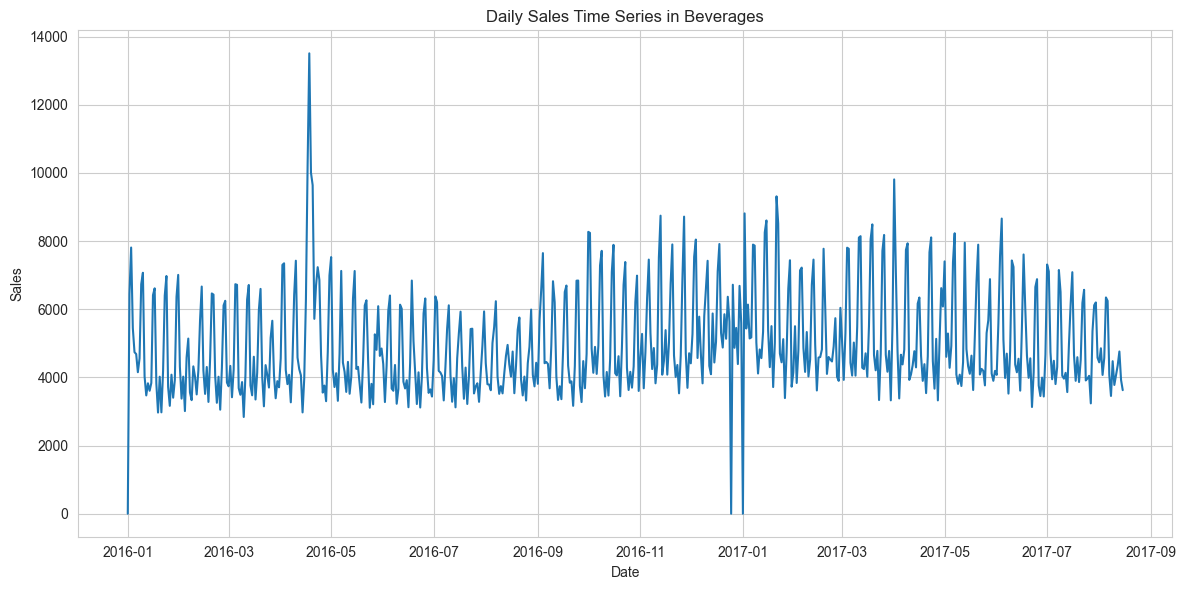

In [20]:
# Plot Product 1
# TODO: Plot product1_ts on a line chart as a time series

plt.figure()
plt.plot(product1_ts)
plt.title("Daily Sales Time Series in Beverages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

### Document Your Choice (2-3 sentences)
Explain why you chose this product. 

I chose the beverages product family because it represents a consistent, everyday product that people purchase regularly, which makes changes in sales patterns easier to observe over time. Beverage sales also show clear differences that reflect weekly habits, seasonal changes, and special events. This makes beverages interesting because it makes it easier to compare sales over time without dealing with products that are very specialized or inconsistent.

---
## Step 3: Identify Trends Using Moving Averages

### Calculate Moving Averages
Calculate the 7-day and 30-day moving averages for the product you are analyzing.

In [22]:
# TODO: Calculate 7-day and 30-day moving averages for your product

# For Product 1
product1_ma7 = product1_ts.rolling(window=7).mean()  # Replace with product1_ts.rolling(window=7).mean()
product1_ma30 = product1_ts.rolling(window=30).mean()  # Replace with product1_ts.rolling(window=30).mean()

### Plot Original Sales
Using matplotlip, plot original sales with both moving averages (7-day and 30-day) overlaid.

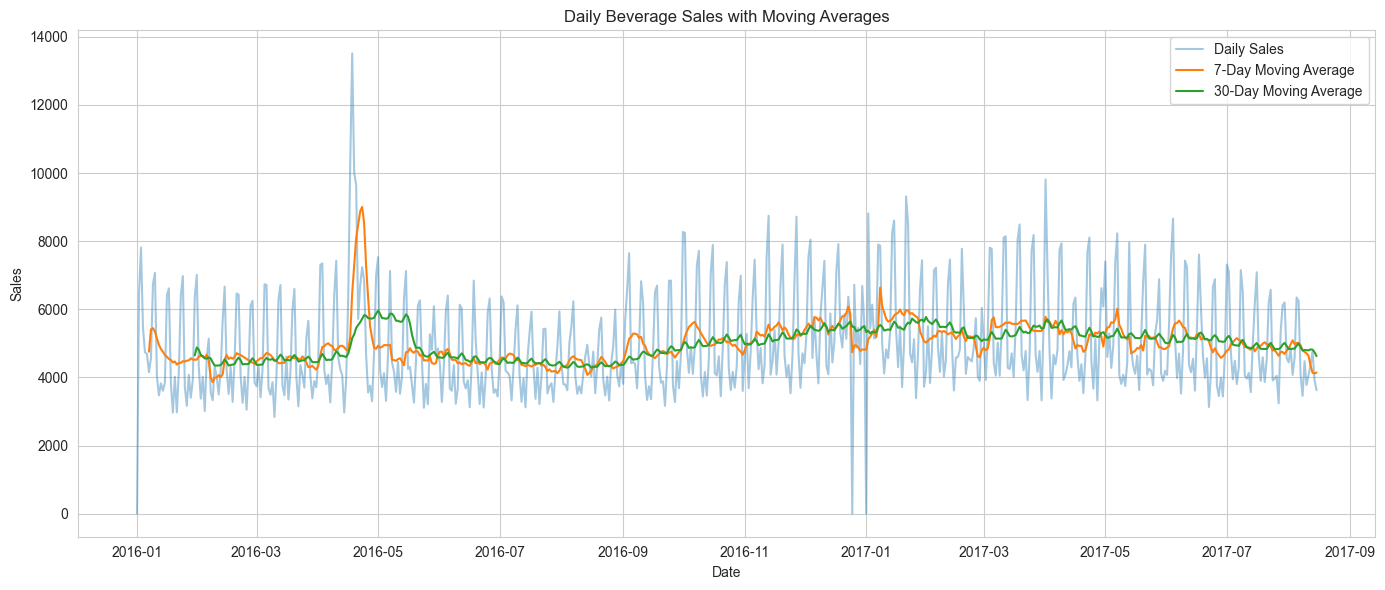

In [23]:
# Plot original sales with moving averages
fig, axes = plt.subplots(1, 1, figsize=(14, 6))

# Product 1
# TODO: Plot original, 7-day MA, and 30-day MA for product 1
plt.plot(product1_ts, label='Daily Sales', alpha=0.4)
plt.plot(product1_ma7, label='7-Day Moving Average')
plt.plot(product1_ma30, label='30-Day Moving Average')

plt.title("Daily Beverage Sales with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

### Identify and Explain Trend Changes

Merge the data with `holidays_events.csv` to explain what caused these changes.

In [ ]:
# Merge with holidays to explain trend changes
# TODO: Convert holidays_df date to datetime and filter for your date range

if holidays_df is not None:
    holidays_df['date'] = pd.to_datetime(holidays_df['date'])
    
    relevant_holidays = holidays_df[holidays_df['date'] >= '2016-01-01']
    relevant_holidays = relevant_holidays[relevant_holidays['date'] <= '2017-08-15']  # Filter holidays_df for your date range
    
    # TODO: Display holidays that might explain trend changes
    print("Key holidays/events in the period:")
    display(relevant_holidays[['date', 'description', 'type']])
    # Display relevant holidays

# Filter for April–May 2016 and January 2017
filtered_holidays = holidays_df[((holidays_df['date'] >= '2016-04-01') & (holidays_df['date'] <= '2016-05-31')) |
    ((holidays_df['date'] >= '2017-01-01') & (holidays_df['date'] <= '2017-01-31'))]

print("(April–May 2016 and January 2017)")
display(filtered_holidays[['date', 'description', 'type']])

Key holidays/events in the period:


,date,description,type
211,2016-01-01,Primer dia del ano,Holiday
212,2016-02-08,Carnaval,Holiday
213,2016-02-09,Carnaval,Holiday
214,2016-03-02,Fundacion de Manta,Holiday
215,2016-03-25,Viernes Santo,Holiday
...,...,...,...
322,2017-07-25,Fundacion de Guayaquil,Additional
323,2017-08-05,Fundacion de Esmeraldas,Holiday
324,2017-08-10,Primer Grito de Independencia,Holiday
325,2017-08-11,Traslado Primer Grito de Independencia,Transfer


(April–May 2016 and January 2017)


,date,description,type
216,2016-04-01,Provincializacion de Cotopaxi,Holiday
217,2016-04-12,Fundacion de Cuenca,Holiday
218,2016-04-14,Cantonizacion de Libertad,Holiday
219,2016-04-16,Terremoto Manabi,Event
220,2016-04-17,Terremoto Manabi+1,Event
221,2016-04-18,Terremoto Manabi+2,Event
222,2016-04-19,Terremoto Manabi+3,Event
223,2016-04-20,Terremoto Manabi+4,Event
224,2016-04-21,Cantonizacion de Riobamba,Holiday
225,2016-04-21,Terremoto Manabi+5,Event


### Document Trend Analysis
For the product family you are analyzing, document:
1. Overall trend direction (growing, declining, stable)
2. Any trend changes that correlate with holidays or events
3. Business implications of the trends you discovered

Update the markdown cell below with your analysis.

**Product Trends:**
- Overall trend direction: Overall, beverage sales remain mostly stable across the time period, with a slight increase toward late 2016 followed by a mild decline into mid-2017.

- Key trend changes: A noticeable spike happens around late April to early May 2016. Another gradual rise is seen from fall 2016 to early 2017. A drop in sales appears in early 2017, and after that it returns to more stable levels by mid-2017.

- Holiday correlations: No holidays affected sales, only events. The "Terremoto Manabi" which is an earthquake, meaning water or other beverages were harder to get during these times, causing an increase in sales. The drop in sales at the beginning of January could have been from new years eve and no one going out. 
- Business implications: Beverage sales show a noticeable increase during April and May of 2016, which aligns with the timing of a major earthquake. Natural disasters often cause people to stock up on essential items such as water and beverages, leading to short-term spikes in sales. This suggests that external events, rather than long-term changes in demand, plays a large role.

---
## Step 4: Detect and Visualize Seasonal Patterns

Analyze the seasonal components of your sales data.

### Day-of-Week Analysis

Add day of week to your data and calculate the average sales by day. Create a bar plot to visualize the weekday patterns.

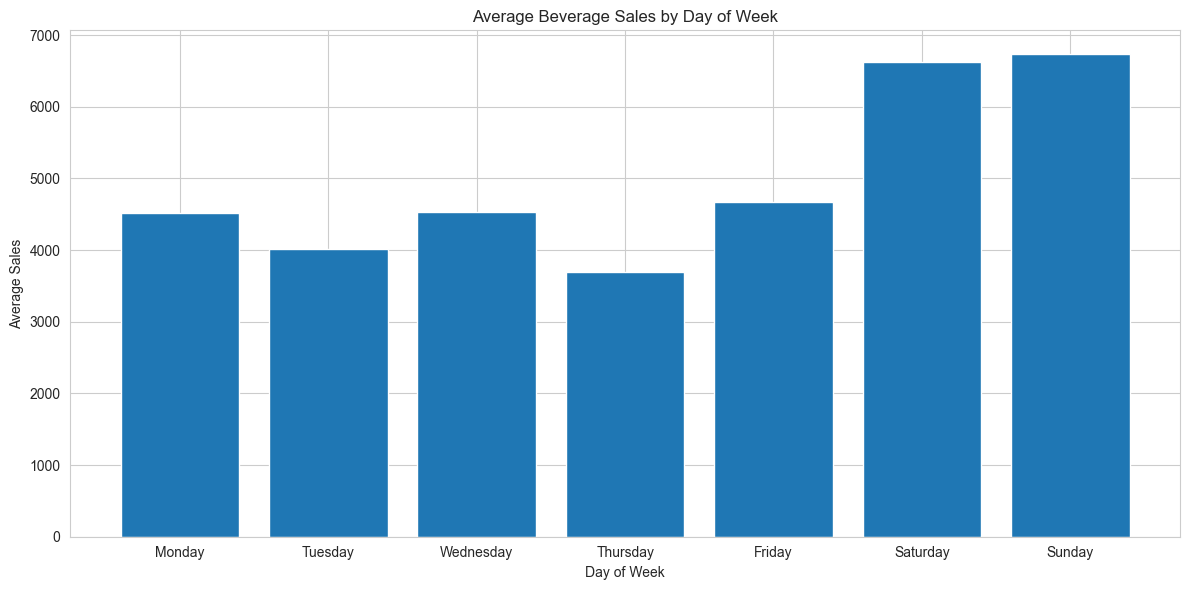

In [ ]:
# Analyze day-of-week patterns
# TODO: Add day of week to your data and calculate average sales by day
product1_dow = product1_ts.reset_index()  # Create DataFrame with date and sales
product1_dow.columns = ['date', 'sales']

# Add day of week: product1_dow['day_of_week'] = product1_dow.index.day_name()
product1_dow['day_of_week'] = product1_dow['date'].dt.day_name()
# Group by day of week and calculate mean sales
dow_avg = product1_dow.groupby('day_of_week')['sales'].mean()

# Visual design
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_avg = dow_avg.reindex(dow_order)

# Create bar plot comparing weekday patterns
# TODO: Create bar plot showing average sales by day of week
plt.figure()
plt.bar(dow_avg.index, dow_avg.values)
plt.title("Average Beverage Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

### Monthly Seasonality Analysis

Calculate the average sales by month for both products. Once calculated, create a line plot showing monthly patterns for the product.

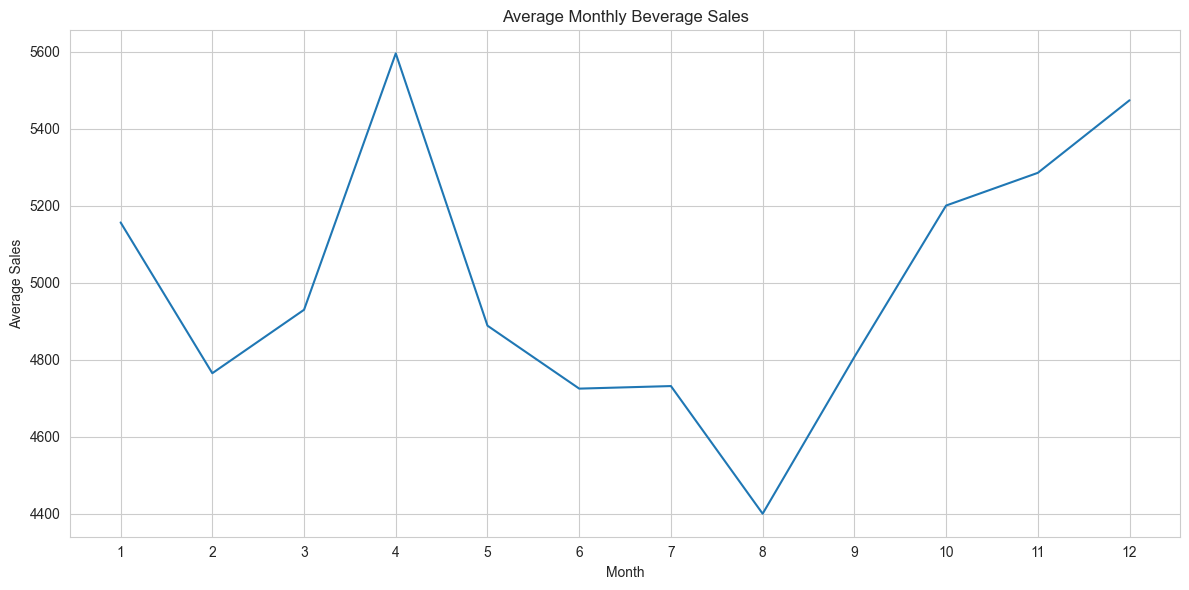

In [32]:
# Analyze monthly patterns
# TODO: Calculate average sales by month for the product.

# For Product 1
product1_monthly = product1_ts.reset_index()  # Group by month and calculate mean sales
product1_monthly.columns = ['date', 'sales']

# Add month
product1_monthly['month'] = product1_monthly['date'].dt.month

# Calculate average sales by month
monthly_avg = product1_monthly.groupby('month')['sales'].mean()

# Create visualization
# TODO: Create line plot showing monthly patterns for both products
plt.figure()
plt.plot(monthly_avg.index, monthly_avg.values)
plt.title("Average Monthly Beverage Sales")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

### Holiday Impact Analysis

Compare the average sales on holidays compared to regular days.

In [34]:
# Analyze holiday vs non-holiday sales
# TODO: Compare average sales on holidays vs regular days

# Create a list of holiday dates
holiday_dates = holidays_df['date'].unique()  # Extract unique dates from holidays_df
# Create DataFrame from time series
sales_df = product1_ts.reset_index()
sales_df.columns = ['date', 'sales']

# Mark holidays
sales_df['is_holiday'] = sales_df['date'].isin(holiday_dates)

# Calculate average sales on holidays vs non-holidays for both products
# TODO: Split data into holiday and non-holiday sales and compare
holiday_sales = sales_df[sales_df['is_holiday']]['sales']
non_holiday_sales = sales_df[~sales_df['is_holiday']]['sales']

# Calculate averages
avg_holiday_sales = holiday_sales.mean()
avg_non_holiday_sales = non_holiday_sales.mean()

print("Average sales on holidays:", avg_holiday_sales)
print("Average sales on non-holidays:", avg_non_holiday_sales)

Average sales on holidays: 5122.524752475248
Average sales on non-holidays: 4942.071138211382


### Seasonal Pattern Findings

**Document your findings:**
- Which days of the week have highest/lowest sales?
- Are there monthly patterns (e.g., payday effects)?
- How do holidays affect each product differently?
- What business decisions could these patterns inform?

Update the markdown cell below with your analysis.

Beverage sales are highest on weekends, with Saturday and Sunday showing noticeably higher average sales compared to weekdays. Sales are lowest during the weekdays, particularly on Tuesday and Thursday, suggesting that no one is purchasing things during typical workdays. This pattern tells us that beverage demand increases when people have more free time or are preparing for social activities.

Monthly patterns show higher average sales in April and again toward the end of the year, with a noticeable dip during the summer months, especially in August. Holidays and special events slightly increase average sales compared to non-holidays, reinforcing the idea that people tend to stock up on beverages during major enviormental events. From a business point of view, these patterns suggest increasing inventory before weekends, major holidays, and when notified early about enviormental events, while decreasing excess stock during slower midweek and late-summer periods.

---
## Step 5: Build Simple Forecasts and Compare Methods

### Time Series Decomposition

In [35]:
# Perform seasonal decomposition
# TODO: Use seasonal_decompose to separate trend, seasonal, and residual components

# For Product 1
decomposition1 = seasonal_decompose(product1_ts, model='additive', period=7)  # seasonal_decompose(product1_ts, model='additive', period=7)

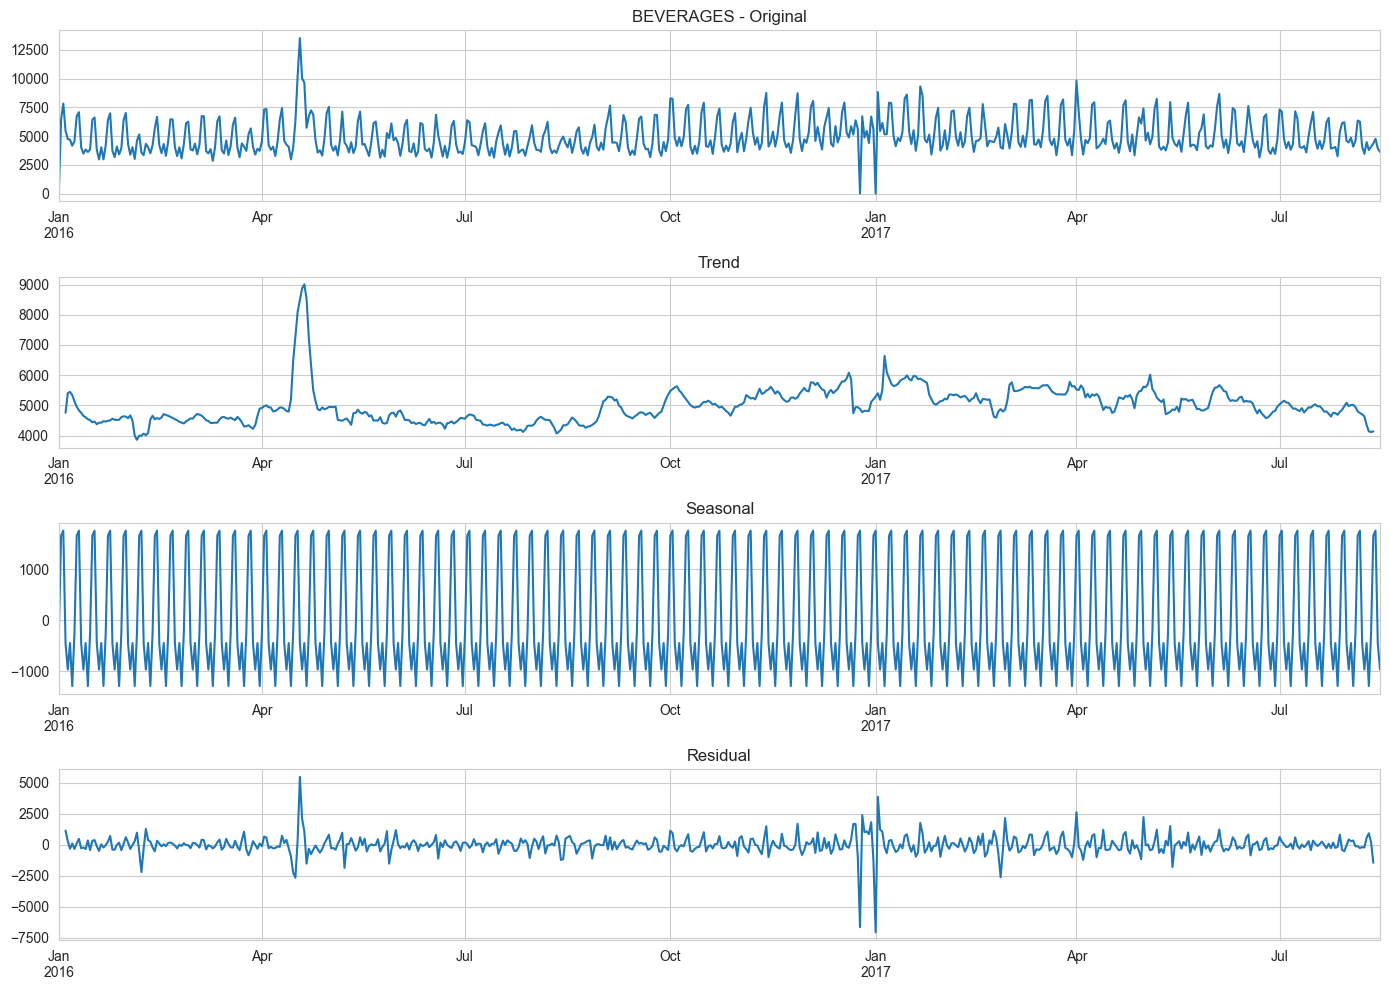

In [36]:
# Visualize decomposition for Product 1
if decomposition1 is not None:
    fig, axes = plt.subplots(4, 1, figsize=(14, 10))
    
    # TODO: Plot each component
    decomposition1.observed.plot(ax=axes[0], title=f'{product_family_1} - Original')
    decomposition1.trend.plot(ax=axes[1], title='Trend')
    decomposition1.seasonal.plot(ax=axes[2], title='Seasonal')
    decomposition1.resid.plot(ax=axes[3], title='Residual')
    
    plt.tight_layout()
    plt.show()

### Build Forecasts
Create a baseline forecast using the average of the last 30 days and a season naive forcast by repeating the last 7 days' pattern.

In [37]:
# Split data for validation
test_days = 30
train = product1_ts[:-test_days] # product1_ts[:-test_days]
test = product1_ts[-test_days:] # product1_ts[-test_days:]

# Method 1: Baseline forecast (30-day average)
baseline_forecast = np.repeat(train[-30:].mean(), test_days)

# Method 2: Seasonal Naive
# Just repeat the last 7 days pattern
last_week = train[-7:].values
seasonal_naive_forecast = np.tile(last_week, int(np.ceil(test_days/7)))[:test_days]

### Calculate Forecast Accuracy

In [38]:
# Calculate RMSE for both methods
# TODO: Calculate RMSE for baseline and seasonal forecasts

# Product 1
baseline_rmse = np.sqrt(mean_squared_error(test, baseline_forecast))  # np.sqrt(mean_squared_error(test1, baseline_forecast1)
seasonal_rmse = np.sqrt(mean_squared_error(test, seasonal_naive_forecast))  # np.sqrt(mean_squared_error(test1, seasonal_naive_forecast))

In [ ]:
# Create comparison table
comparison_data = {
    'Method': ['30-Day Average', 'Seasonal Naive (7-day repeat)'],
    'RMSE': [baseline_rmse, seasonal_rmse],
}

comparison_df = pd.DataFrame(comparison_data)

# TODO: Calculate percentage improvement
# Add improvement column to comparison_df
comparison_df['Improvement (%)'] = ((comparison_df['RMSE'].iloc[0] - comparison_df['RMSE']) / comparison_df['RMSE'].iloc[0]) * 100

print("\n" + "="*80)
print("FORECAST PERFORMANCE COMPARISON")
print("="*80)
# TODO: Display comparison table
display(comparison_df)

print("="*80)


FORECAST PERFORMANCE COMPARISON


,Method,RMSE,Improvement (%)
0,30-Day Average,1008.098386,0.000000
1,Seasonal Naive (7-day repeat),693.525246,31.204607


### Visualize Forecasts

count      60.000000
mean     5082.933333
std      1427.313405
min      3132.000000
25%      3992.500000
50%      4554.000000
75%      6241.250000
max      8662.000000
Name: sales, dtype: float64


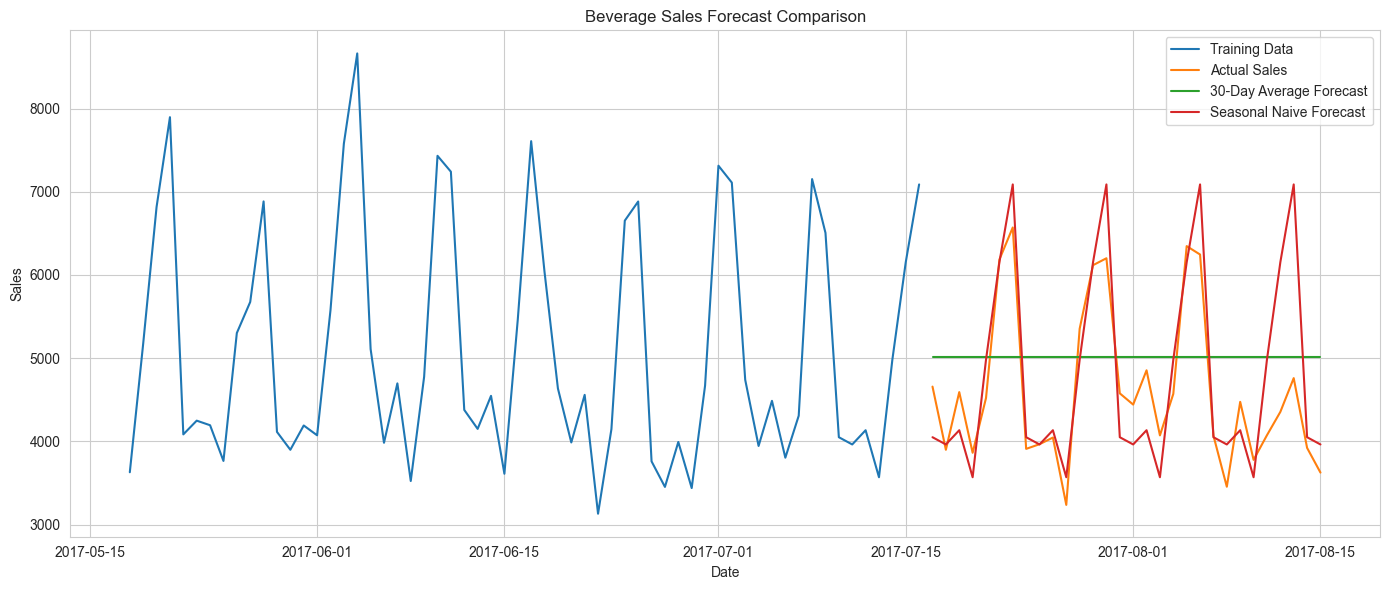

In [44]:
# Plot actual vs forecasted values
# TODO: Create visualization showing:
# - Historical data (last 60 days of train)
# - Actual test data
# - Baseline forecast
# - Seasonal naive forecast

plt.figure(figsize=(14, 6))
# Last 60 days
plt.plot(train[-60:].index, train[-60:].values, label='Training Data')
# Showed as a straight line on graph
print(train[-60:].describe())

# Actual test data
plt.plot(test.index, test.values, label='Actual Sales')

# Forecasts
plt.plot(test.index, baseline_forecast, label='30-Day Average Forecast')
plt.plot(test.index, seasonal_naive_forecast, label='Seasonal Naive Forecast')

# TODO: Plot on this single figure

plt.title("Beverage Sales Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

---
## Step 6: Generate Business Recommendations

### Executive Summary (200-300 words)

Based on your analysis, write a brief executive summary that includes:
- **Key Patterns Discovered:** Summarize the main trends and seasonal patterns for each product
- **Inventory Planning Recommendations:** Specific recommendations based on your findings
- **High-Risk Periods:** Identify periods requiring special attention
- **Predictability Analysis:** Which product is more predictable and why?
- **Specific Action Item:** One concrete action the store manager should take based on your forecast

- This analysis focused on beverage sales for a single store over time to understand overall patterns, seasonal changes, and short-term fluctuations. Beverage sales remained generally stable throughout the period, with clear and repeatable weekly patterns. Sales were typicaaly higher on weekends, while lower sales were observed during workdays. Monthly patterns showed higher sales in early spring and toward the end of the year, with a noticeable dip during late summer. Short-term spikes were also observed during holidays and major events.

- From an inventory planning perspective, these patterns suggest that beverage demand is predictable under normal conditions but increases in holidays and unexpected events. Inventory should be increased ahead of weekends and known holidays to prevent shortages, while maintaining a reasonable inventory during slower workday periods. There also should be a focus on weather events as much as possiable with upcoming natural disasters, since these events can cause sudden increases in demand as customers stock up on essential items like beverages.

- High-risk periods include holidays, weekends, and emergency events, where demand can rise quickly and unexpectedly. Outside of these periods, beverage sales are relatively consistent, making them easier to plan for compared to more specialized products. 

- The forecasting results showed that the seasonal method performed better than a simple 30-day average. This tells us that that beverage sales follow strong weekly behavior and are reletivly predictable.

- A specific action item for store management would be to adjust beverage inventory levels based on weekly patterns by increasing stock before weekends and looking at inventory during holidays or emergency situations. This way would help reduce out-of-stock issues and avoiding unnecessary overstock.

---
## Step 7: Submit Your Work

Before submitting:
1. Ensure all code cells run without errors
2. Verify all visualizations display correctly
3. Check that your analysis sections are complete
4. Review your executive summary

Push to GitHub:
```bash
git add .
git commit -m 'completed time series forecasting assignment'
git push
```

Submit your GitHub repository link on the course platform.